In [1]:
import pandas as pd

f1scores = pd.read_csv('score_F1.csv')
survey_results_excel = pd.read_excel('survey_results.xlsx')

In [2]:
f1scores.head()

,participant,window,history,window+ad,history+ad
0,18,0.60,0.67,0.79,0.57
1,43,0.51,0.93,0.59,0.84
2,51,0.74,0.87,0.60,0.76
3,42,0.49,0.59,0.79,0.33
4,12,0.70,0.93,0.93,0.78


In [3]:
survey_results_excel.head()

,anomaly_difficulty,automatic_detection_helpful,automatic_detection_helpful_explanation,history_helpful,history_helpful_explanation,difficult_v1,difficult_v2,difficult_v3,difficult_v4,preference_v1,preference_v2,preference_v3,preference_v4,issues_or_interruptions,participant
0,2,5.0,Gives you better focus point to find the anoma...,7,Patterns were easier spotted,1,2,3,4,4,3,2,1,-,4
1,2,6.0,I felt like I was missing it when the automati...,5,I used it to check the pattern again. Sometime...,1,4,3,2,4,2,3,1,"No, none.",6
2,2,5.0,I help getting my attention but I also had to ...,4,Only a couple of times,4,2,1,3,3,2,4,1,NaN,7
3,2,5.0,It did help me with finding anomalies which I ...,6,"If the blocks were closer to eachother, it was...",1,3,2,4,3,2,4,1,nope,8
4,1,5.0,they highlight ones that could potentially be ...,2,I felt distracted by it. wanting to compensate...,4,3,2,1,1,2,3,4,nope,9


In [4]:
combined_df = survey_results_excel.merge(f1scores, on='participant')

In [5]:
combined_df.head()
combined_df = combined_df[combined_df['participant'] != 11]
combined_df = combined_df[combined_df['participant'] != 42]
# combined_df['anomaly_difficulty'] = combined_df['anomaly_difficulty'].astype(str)
combined_df['anomaly_difficulty'] = combined_df['anomaly_difficulty'].replace({
    1: '1',
    2: '2+3',
    3: '4',
    4: '5'
})

combined_df['automatic_detection_helpful'] = combined_df['automatic_detection_helpful'].fillna(4)
combined_df['automatic_detection_helpful'] = combined_df['automatic_detection_helpful'].astype(int)
combined_df['automatic_detection_helpful'] = combined_df['automatic_detection_helpful'].astype(str)
combined_df['history_helpful'] = combined_df['history_helpful'].astype(str)


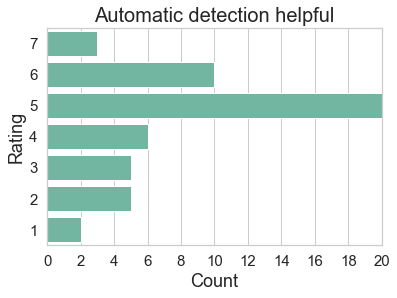

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the first color from the 'Set2' palette
set2_palette = sns.color_palette('Set2')
first_color = set2_palette[0]

sns.set()
sns.set_theme(style="whitegrid")

# Aggregate data to count occurrences of each rating
rating_counts = combined_df['automatic_detection_helpful'].value_counts().sort_index(ascending=False)
rating_counts = pd.DataFrame(rating_counts).reset_index()
rating_counts.columns = ['Rating', 'Count']
rating_counts

# Create the horizontal bar plot
sns.barplot(y=rating_counts['Rating'], x=rating_counts['Count'], color=first_color)

# Set the labels and title
plt.ylabel('Rating', fontsize=18)
plt.xlabel('Count', fontsize=18)
plt.title('Automatic detection helpful', fontsize=20)

# Increase the text size of the y-axis tick labels
plt.xlim(0, 20)
plt.xticks(range(0, 21, 2), fontsize=15)
plt.yticks(fontsize=15)

# Show the plot
plt.show()


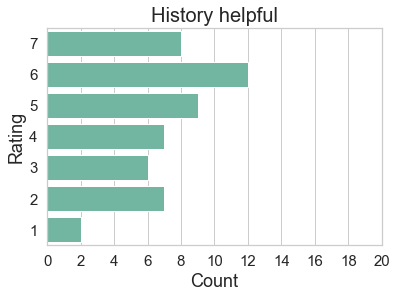

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the first color from the 'Set2' palette
set2_palette = sns.color_palette('Set2')
first_color = set2_palette[0]

sns.set()
sns.set_theme(style="whitegrid")

# Aggregate data to count occurrences of each rating
rating_counts = combined_df['history_helpful'].value_counts().sort_index(ascending=False)
rating_counts = pd.DataFrame(rating_counts).reset_index()
rating_counts.columns = ['Rating', 'Count']
rating_counts

# Create the horizontal bar plot
sns.barplot(y=rating_counts['Rating'], x=rating_counts['Count'], color=first_color)

# Set the labels and title
plt.ylabel('Rating', fontsize=18)
plt.xlabel('Count', fontsize=18)
plt.title('History helpful', fontsize=20)

# Increase the text size of the y-axis tick labels
plt.xlim(0, 20)
plt.xticks(range(0, 21, 2), fontsize=15)
plt.yticks(fontsize=15)

# Show the plot
plt.show()


C:\Users\s152296\AppData\Local\Temp\ipykernel_17348\2133715460.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rating_counts = rating_counts.append({'Rating': 6, 'Count': 0}, ignore_index=True)
C:\Users\s152296\AppData\Local\Temp\ipykernel_17348\2133715460.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rating_counts = rating_counts.append({'Rating': 7, 'Count': 0}, ignore_index=True)


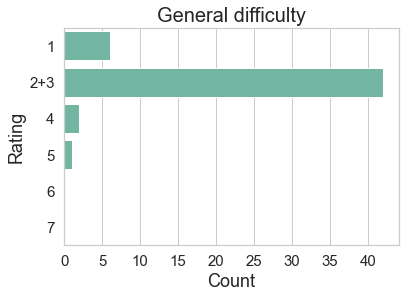

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the first color from the 'Set2' palette
set2_palette = sns.color_palette('Set2')
first_color = set2_palette[0]

sns.set()
sns.set_theme(style="whitegrid")

# Aggregate data to count occurrences of each rating
rating_counts = combined_df['anomaly_difficulty'].value_counts().sort_index()
rating_counts = pd.DataFrame(rating_counts).reset_index()
rating_counts.columns = ['Rating', 'Count']
rating_counts = rating_counts.append({'Rating': 6, 'Count': 0}, ignore_index=True)
rating_counts = rating_counts.append({'Rating': 7, 'Count': 0}, ignore_index=True)
rating_counts

# Create the horizontal bar plot
sns.barplot(y=rating_counts['Rating'], x=rating_counts['Count'], color=first_color)

# Set the labels and title
plt.ylabel('Rating', fontsize=18)
plt.xlabel('Count', fontsize=18)
plt.title('General difficulty', fontsize=20)

# Increase the text size of the y-axis tick labels
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Show the plot
plt.show()

In [9]:
metrics = combined_df[['automatic_detection_helpful', 'history_helpful']].describe()
metrics

,automatic_detection_helpful,history_helpful
count,51,51
unique,7,7
top,5,6
freq,20,12


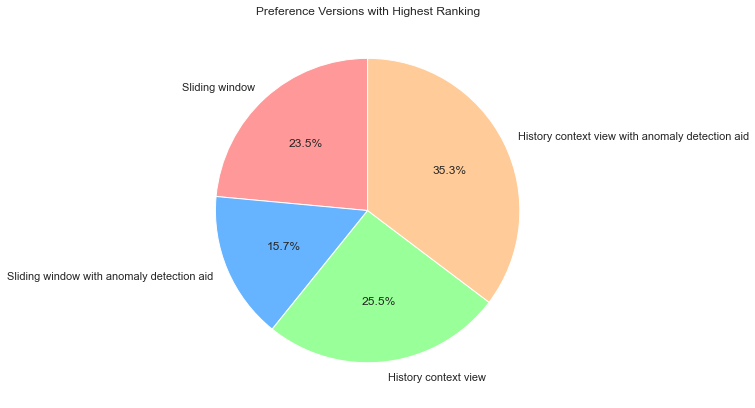

In [10]:
import matplotlib.pyplot as plt

# Count the occurrences of each version with value 1
version_counts = [
    combined_df[combined_df['preference_v1'] == 1].shape[0],
    combined_df[combined_df['preference_v2'] == 1].shape[0],
    combined_df[combined_df['preference_v3'] == 1].shape[0],
    combined_df[combined_df['preference_v4'] == 1].shape[0]
]

# Define the new labels for the pie chart
labels = [
    'Sliding window',
    'Sliding window with anomaly detection aid',
    'History context view',
    'History context view with anomaly detection aid'
]

# Define a modern color palette
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Create the pie chart with enhancements
plt.figure(figsize=(10, 7))  # Larger figure size
plt.pie(version_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors,  explode=(0, 0, 0, 0))

# Add a title
plt.title('Preference Versions with Highest Ranking')

# Display the chart
plt.show()


[12, 8, 13, 18]


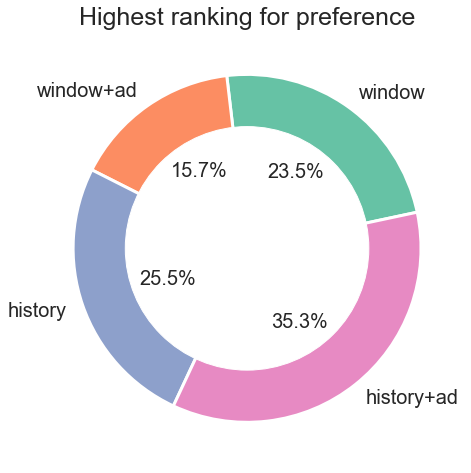

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each version with value 1
version_counts = [
    combined_df[combined_df['preference_v1'] == 1].shape[0],
    combined_df[combined_df['preference_v2'] == 1].shape[0],
    combined_df[combined_df['preference_v3'] == 1].shape[0],
    combined_df[combined_df['preference_v4'] == 1].shape[0]
]

print(version_counts)

# Set the seaborn style
sns.set()

# Define the new labels for the pie chart
labels = [
    'window',
    'window+ad',
    'history',
    'history+ad'
]

# Create the pie plot using matplotlib
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    version_counts, 
    labels=labels,  
    autopct='%1.1f%%',
    colors=sns.color_palette("Set2"), 
    textprops={'fontsize': 20},  # Adjust the label text size
    wedgeprops={'linewidth': 3},  # Increase the wedge border size
    startangle= 12 # Rotate the pie chart by 65 degrees
)

# Add a title
plt.title('Highest ranking for preference', fontsize=25)

# Adjust the position of the percentage text slightly inward
for autotext in autotexts:
    autotext.set_position((autotext.get_position()[0]*0.8, autotext.get_position()[1]*0.9))

# Make the circle smaller to create a donut plot
plt.gcf().gca().add_artist(plt.Circle((0, 0), 0.70, fc='white'))

# Save the plot before displaying it
#plt.savefig('age.png')

# Display the chart
plt.show()

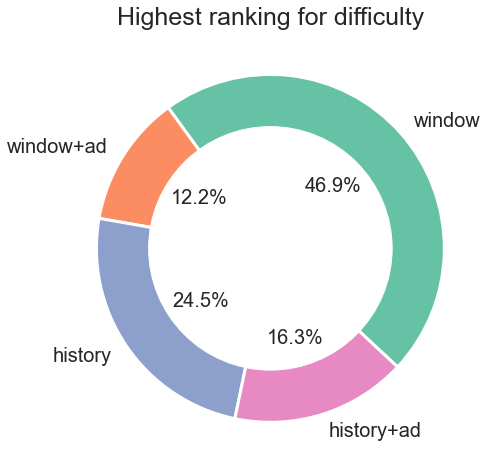

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each version with value 1
version_counts = [
    combined_df[combined_df['difficult_v1'] == 1].shape[0],
    combined_df[combined_df['difficult_v2'] == 1].shape[0],
    combined_df[combined_df['difficult_v3'] == 1].shape[0],
    combined_df[combined_df['difficult_v4'] == 1].shape[0]
]

# Set the seaborn style
sns.set()

# Define the new labels for the pie chart
labels = [
    'window',
    'window+ad',
    'history',
    'history+ad'
]

# Create the pie plot using matplotlib
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    version_counts, 
    labels=labels,  
    autopct='%1.1f%%',
    colors=sns.color_palette("Set2"), 
    textprops={'fontsize': 20},  # Adjust the label text size
    wedgeprops={'linewidth': 3},  # Increase the wedge border size
    startangle=317  # Rotate the pie chart by 65 degrees
)

# Add a title
plt.title('Highest ranking for difficulty', fontsize=25)

# Adjust the position of the percentage text slightly inward
for autotext in autotexts:
    autotext.set_position((autotext.get_position()[0]*0.8, autotext.get_position()[1]*0.9))

# Make the circle smaller to create a donut plot
plt.gcf().gca().add_artist(plt.Circle((0, 0), 0.70, fc='white'))

# Save the plot before displaying it
#plt.savefig('age.png')

# Display the chart
plt.show()

### Hier bezig met ranking!

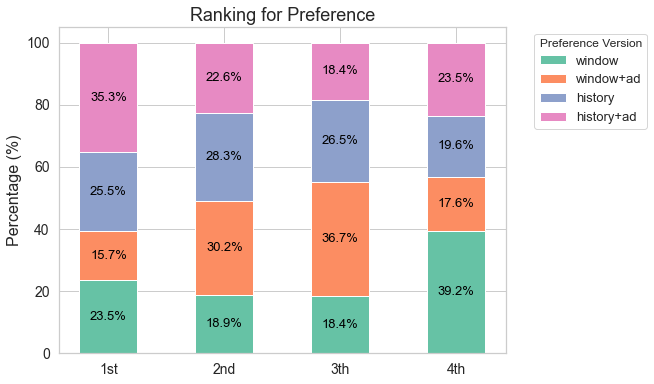

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming combined_df is already defined

# Count the occurrences of each version with value 1 for the first dataset
version_counts1 = [
    combined_df[combined_df['preference_v1'] == 1].shape[0],
    combined_df[combined_df['preference_v2'] == 1].shape[0],
    combined_df[combined_df['preference_v3'] == 1].shape[0],
    combined_df[combined_df['preference_v4'] == 1].shape[0]
]

# Count the occurrences of each version with value 1 for the second dataset
version_counts2 = [
    combined_df[combined_df['preference_v1'] == 2].shape[0],
    combined_df[combined_df['preference_v2'] == 2].shape[0],
    combined_df[combined_df['preference_v3'] == 2].shape[0],
    combined_df[combined_df['preference_v4'] == 2].shape[0]
]

# Count the occurrences of each version with value 1 for the third dataset
version_counts3 = [
    combined_df[combined_df['preference_v1'] == 3].shape[0],
    combined_df[combined_df['preference_v2'] == 3].shape[0],
    combined_df[combined_df['preference_v3'] == 3].shape[0],
    combined_df[combined_df['preference_v4'] == 3].shape[0]
]

# Count the occurrences of each version with value 1 for the fourth dataset
version_counts4 = [
    combined_df[combined_df['preference_v1'] == 4].shape[0],
    combined_df[combined_df['preference_v2'] == 4].shape[0],
    combined_df[combined_df['preference_v3'] == 4].shape[0],
    combined_df[combined_df['preference_v4'] == 4].shape[0]
]

# Calculate percentages for all datasets
total_counts1 = sum(version_counts1)
version_percentages1 = [(count / total_counts1) * 100 for count in version_counts1]

total_counts2 = sum(version_counts2)
version_percentages2 = [(count / total_counts2) * 100 for count in version_counts2]

total_counts3 = sum(version_counts3)
version_percentages3 = [(count / total_counts3) * 100 for count in version_counts3]

total_counts4 = sum(version_counts4)
version_percentages4 = [(count / total_counts4) * 100 for count in version_counts4]

# Define the new labels for the bar chart
labels = [
    'window',
    'window+ad',
    'history',
    'history+ad'
]

# Set the seaborn style
sns.set()
sns.set_theme(style="whitegrid")

# Create the stacked bar plot using matplotlib
plt.figure(figsize=(8, 6))

# Define bar width
bar_width = 0.5

# Plot the first stacked bar
cumulative_percentage = 0
for i, (label, percentage) in enumerate(zip(labels, version_percentages1)):
    plt.bar(0, percentage, bottom=cumulative_percentage, width=bar_width, label=label, color=sns.color_palette("Set2")[i])
    cumulative_percentage += percentage
    plt.text(0, cumulative_percentage - percentage / 2, f'{percentage:.1f}%', ha='center', va='center', fontsize=13, color='black')

# Plot the second stacked bar
cumulative_percentage = 0
for i, (label, percentage) in enumerate(zip(labels, version_percentages2)):
    plt.bar(1, percentage, bottom=cumulative_percentage, width=bar_width, color=sns.color_palette("Set2")[i])
    cumulative_percentage += percentage
    plt.text(1, cumulative_percentage - percentage / 2, f'{percentage:.1f}%', ha='center', va='center', fontsize=13, color='black')

# Plot the third stacked bar
cumulative_percentage = 0
for i, (label, percentage) in enumerate(zip(labels, version_percentages3)):
    plt.bar(2, percentage, bottom=cumulative_percentage, width=bar_width, color=sns.color_palette("Set2")[i])
    cumulative_percentage += percentage
    plt.text(2, cumulative_percentage - percentage / 2, f'{percentage:.1f}%', ha='center', va='center', fontsize=13, color='black')

# Plot the fourth stacked bar
cumulative_percentage = 0
for i, (label, percentage) in enumerate(zip(labels, version_percentages4)):
    plt.bar(3, percentage, bottom=cumulative_percentage, width=bar_width, color=sns.color_palette("Set2")[i])
    cumulative_percentage += percentage
    plt.text(3, cumulative_percentage - percentage / 2, f'{percentage:.1f}%', ha='center', va='center', fontsize=13, color='black')

# Add a title and labels
plt.title('Ranking for Preference', fontsize=18)
plt.xlabel('')
plt.ylabel('Percentage (%)', fontsize=16)
plt.xticks([0, 1, 2, 3], ['1st', '2nd', '3th', '4th'], fontsize=14)
plt.yticks(fontsize=14)

# Add legend
plt.legend(title='Preference Version', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=13)

# Display the chart
plt.show()


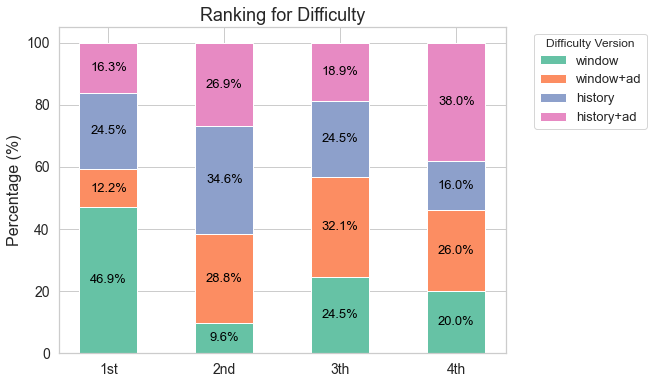

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming combined_df is already defined

# Count the occurrences of each version with value 1 for the first dataset
difficult_counts1 = [
    combined_df[combined_df['difficult_v1'] == 1].shape[0],
    combined_df[combined_df['difficult_v2'] == 1].shape[0],
    combined_df[combined_df['difficult_v3'] == 1].shape[0],
    combined_df[combined_df['difficult_v4'] == 1].shape[0]
]

# Count the occurrences of each version with value 1 for the second dataset
difficult_counts2 = [
    combined_df[combined_df['difficult_v1'] == 2].shape[0],
    combined_df[combined_df['difficult_v2'] == 2].shape[0],
    combined_df[combined_df['difficult_v3'] == 2].shape[0],
    combined_df[combined_df['difficult_v4'] == 2].shape[0]
]

# Count the occurrences of each version with value 1 for the third dataset
difficult_counts3 = [
    combined_df[combined_df['difficult_v1'] == 3].shape[0],
    combined_df[combined_df['difficult_v2'] == 3].shape[0],
    combined_df[combined_df['difficult_v3'] == 3].shape[0],
    combined_df[combined_df['difficult_v4'] == 3].shape[0]
]

# Count the occurrences of each version with value 1 for the fourth dataset
difficult_counts4 = [
    combined_df[combined_df['difficult_v1'] == 4].shape[0],
    combined_df[combined_df['difficult_v2'] == 4].shape[0],
    combined_df[combined_df['difficult_v3'] == 4].shape[0],
    combined_df[combined_df['difficult_v4'] == 4].shape[0]
]

# Calculate percentages for all datasets
total_counts1 = sum(difficult_counts1)
difficult_percentages1 = [(count / total_counts1) * 100 for count in difficult_counts1]

total_counts2 = sum(difficult_counts2)
difficult_percentages2 = [(count / total_counts2) * 100 for count in difficult_counts2]

total_counts3 = sum(difficult_counts3)
difficult_percentages3 = [(count / total_counts3) * 100 for count in difficult_counts3]

total_counts4 = sum(difficult_counts4)
difficult_percentages4 = [(count / total_counts4) * 100 for count in difficult_counts4]

# Define the new labels for the bar chart
labels = [
    'window',
    'window+ad',
    'history',
    'history+ad'
]

# Set the seaborn style
sns.set()
sns.set_theme(style="whitegrid")

# Create the stacked bar plot using matplotlib
plt.figure(figsize=(8, 6))

# Define bar width
bar_width = 0.5

# Plot the first stacked bar
cumulative_percentage = 0
for i, (label, percentage) in enumerate(zip(labels, difficult_percentages1)):
    plt.bar(0, percentage, bottom=cumulative_percentage, width=bar_width, label=label, color=sns.color_palette("Set2")[i])
    cumulative_percentage += percentage
    plt.text(0, cumulative_percentage - percentage / 2, f'{percentage:.1f}%', ha='center', va='center', fontsize=13, color='black')

# Plot the second stacked bar
cumulative_percentage = 0
for i, (label, percentage) in enumerate(zip(labels, difficult_percentages2)):
    plt.bar(1, percentage, bottom=cumulative_percentage, width=bar_width, color=sns.color_palette("Set2")[i])
    cumulative_percentage += percentage
    plt.text(1, cumulative_percentage - percentage / 2, f'{percentage:.1f}%', ha='center', va='center', fontsize=13, color='black')

# Plot the third stacked bar
cumulative_percentage = 0
for i, (label, percentage) in enumerate(zip(labels, difficult_percentages3)):
    plt.bar(2, percentage, bottom=cumulative_percentage, width=bar_width, color=sns.color_palette("Set2")[i])
    cumulative_percentage += percentage
    plt.text(2, cumulative_percentage - percentage / 2, f'{percentage:.1f}%', ha='center', va='center', fontsize=13, color='black')

# Plot the fourth stacked bar
cumulative_percentage = 0
for i, (label, percentage) in enumerate(zip(labels, difficult_percentages4)):
    plt.bar(3, percentage, bottom=cumulative_percentage, width=bar_width, color=sns.color_palette("Set2")[i])
    cumulative_percentage += percentage
    plt.text(3, cumulative_percentage - percentage / 2, f'{percentage:.1f}%', ha='center', va='center', fontsize=13, color='black')

# Add a title and labels
plt.title('Ranking for Difficulty', fontsize=18)
plt.xlabel('')
plt.ylabel('Percentage (%)', fontsize=16)
plt.xticks([0, 1, 2, 3], ['1st', '2nd', '3th', '4th'] , fontsize=14)
plt.yticks(fontsize=14)

# Add legend
plt.legend(title='Difficulty Version', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=13)

# Display the chart
plt.show()
